<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
import torch
from torch import nn 
import numpy as np
import matplotlib.pyplot as plt


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [2]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

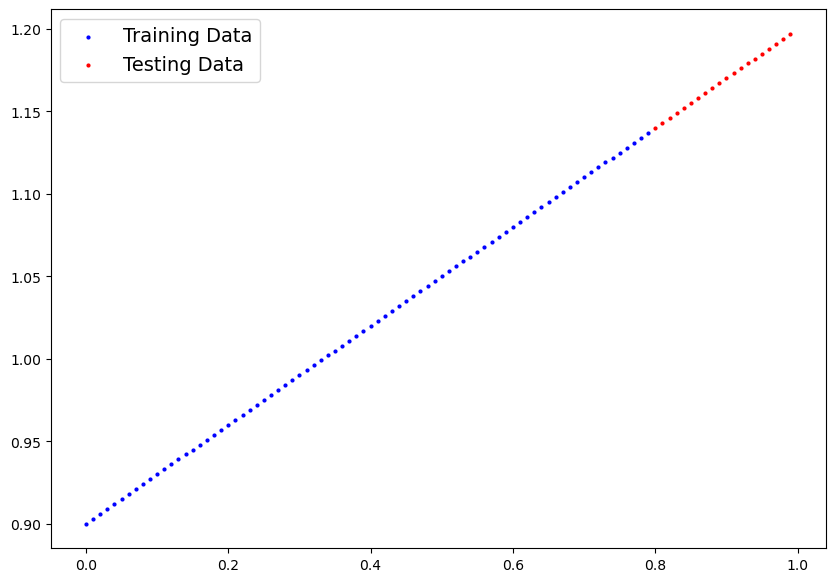

In [4]:
def plotstuff(train_data = X_train,train_label = y_train, test_data = X_test, test_label = y_test, predictions = None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_label, c = 'b', s = 4, label = 'Training Data')

  plt.scatter(test_data, test_label, c = 'r', s = 4, label = 'Testing Data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'k', s = 4, label = 'Predictions') 
  
  plt.legend(prop={"size":14})

plotstuff()



## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [5]:
class LinearReg(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [30]:
torch.manual_seed(42)
model1 = LinearReg()
print(model1, model1.state_dict())
model1.requires_grad = True

LinearReg(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
) OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [7]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.01)

In [8]:
torch.manual_seed(42)

epochs = 300

for epoch in range(epochs):

  model1.train()

  y_pred = model1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

# Testing Loop

  model1.eval()

  with torch.inference_mode():
    test_pred = model1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.12756133079528809 | Test Loss: 0.33650320768356323
Epoch: 20 | Loss: 0.08187223970890045 | Test Loss: 0.2184026539325714
Epoch: 40 | Loss: 0.07207288593053818 | Test Loss: 0.17458662390708923
Epoch: 60 | Loss: 0.06507987529039383 | Test Loss: 0.15310418605804443
Epoch: 80 | Loss: 0.05822876840829849 | Test Loss: 0.1367770880460739
Epoch: 100 | Loss: 0.05137667804956436 | Test Loss: 0.12079393863677979
Epoch: 120 | Loss: 0.044525571167469025 | Test Loss: 0.10446684062480927
Epoch: 140 | Loss: 0.037674423307180405 | Test Loss: 0.08813951164484024
Epoch: 160 | Loss: 0.03082224354147911 | Test Loss: 0.0721558928489685
Epoch: 180 | Loss: 0.02397105097770691 | Test Loss: 0.055828340351581573
Epoch: 200 | Loss: 0.01711984910070896 | Test Loss: 0.03950077295303345
Epoch: 220 | Loss: 0.010267667472362518 | Test Loss: 0.02351721003651619
Epoch: 240 | Loss: 0.0034169009886682034 | Test Loss: 0.007191836833953857
Epoch: 260 | Loss: 0.007878491654992104 | Test Loss: 0.00706424703

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [11]:
model1.state_dict()
model1.eval()
with torch.inference_mode():
  y_preds = model1(X_test).numpy()
y_preds

array([[1.1332616],
       [1.1362897],
       [1.1393179],
       [1.142346 ],
       [1.1453742],
       [1.1484023],
       [1.1514305],
       [1.1544586],
       [1.1574868],
       [1.160515 ],
       [1.163543 ],
       [1.1665711],
       [1.1695993],
       [1.1726274],
       [1.1756556],
       [1.1786838],
       [1.1817119],
       [1.1847401],
       [1.1877682],
       [1.1907964]], dtype=float32)

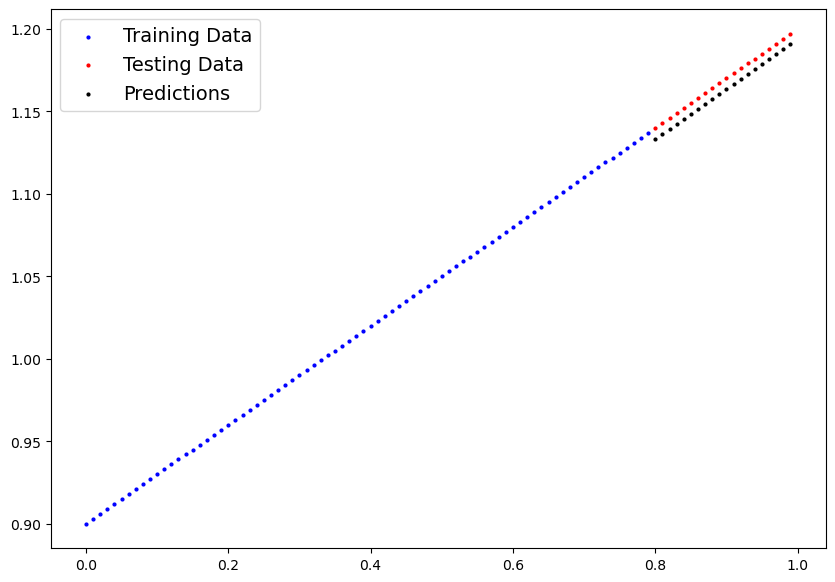

In [12]:
plotstuff(predictions=y_preds)


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [13]:
from pathlib import Path

MODEL_PATH = Path("models")

MODEL_PATH.mkdir(parents=True, exist_ok = 'True')

MODEL_NAME = "workflow_ex.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving Model to {MODEL_SAVE_PATH}")
torch.save(obj = model1, f = MODEL_SAVE_PATH)

Saving Model to models/workflow_ex.pth


In [14]:
model2 = LinearReg()
model2 = torch.load((MODEL_SAVE_PATH))
model2, model2.state_dict()

(LinearReg(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.3028]])),
              ('linear_layer.bias', tensor([0.8910]))]))

In [17]:
y_preds_new = model2(X_test)

In [29]:
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [31]:
model2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3028]])),
             ('linear_layer.bias', tensor([0.8910]))])